# 9. Word frequencies

The notebook on *Tokenisation* explained how we can divide a text into its separate words. Once we have managed to do this, we can begin to count the **types** (i.e. the occurrences of the unique words). 

## The Counter object
 
The task of *counting* can be performed very effectively in Python using the `Counter` object in the `collections` package. 

To demonstarte how this object works, we firstly create a list of words. As was discussed earlier, such a list of words can be created using the word_tokenize method from nltk.

In [1]:
from nltk import word_tokenize
from text_mining import remove_punctuation

quote = '''It was the best of times, it was the worst of times, 
it was the age of wisdom, it was the age of foolishness, 
it was the epoch of belief, it was the epoch of incredulity'''

words = remove_punctuation(word_tokenize(quote.lower()))

Please note that the cell above also make use of the function `remove_punctuation`, which was discussed earlier. The function is also defined in a module named `text_mining`. This module is imported on the second line. 

After you have run the cell above, the `list` named 'words' contains the individual words in the quote that was given. As you can see, certain words are used repeatedly, such as 'times', 'age' and 'it'. 

To work with the `Counter` object it firstly needs to be imported. The object is part of the `collections` package.  

The `Counter` can be initiated with a Python list, as follows. 

In [2]:
from collections import Counter

word_frequencies = Counter(words)

The variable named `word_frequencies`, created in the cell above, is an instantiation of the `Counter` object. It has been created with all the words (or tokens) in the list named `words`.

It is a varibale that contains multiple items. Each item consists of two components: 
1. The word (or more specifically: the type) 
2. The number of times the word occurs in the original text fragment. 

The variable `word_frequencies` is in fact a specific type of [dictionary](https://cdsleiden.github.io/python-tutorial/notebooks/6%20Dictionaries.html). 

In [3]:
print(word_frequencies)

Counter({'it': 6, 'was': 6, 'the': 6, 'of': 6, 'times': 2, 'age': 2, 'epoch': 2, 'best': 1, 'worst': 1, 'wisdom': 1, 'foolishness': 1, 'belief': 1, 'incredulity': 1})


If necessary, you can also add more words to the Counter object using the `update()` method.

In [4]:
next_sentence = '''It was the season of Light, 
it was the season of Darkness, it was the spring of hope, 
it was the winter of despair.'''

words = remove_punctuation(word_tokenize(quote.lower()))
word_frequencies.update(words)

print(word_frequencies)

Counter({'it': 12, 'was': 12, 'the': 12, 'of': 12, 'times': 4, 'age': 4, 'epoch': 4, 'best': 2, 'worst': 2, 'wisdom': 2, 'foolishness': 2, 'belief': 2, 'incredulity': 2})


The `Counter` object has a method named `most_common()` which can be used to list the items with the highest frequencies. The parameter of this method specifies the number of items to be shown.

If you iterate across all the items returned by `most_common()`, two values are available in each iteration: (1) the word (or type) and (2) the frequency of this token. 

In [14]:
for word, count in word_frequencies.most_common(10):
    print(f'{word} => {count}')

times => 2
age => 2
epoch => 2
best => 1
worst => 1
wisdom => 1
foolishness => 1
belief => 1
incredulity => 1


The frequency of a specific word in a text can be found by mentioned this word in square brackets after the variable named `word_frequencies`, which, as mentioned, is an instance of the `Counter` object. 

In [16]:
print(word_frequencies['times'])

2


### Exercise 9.1.

The 'Corpus' folder contains the full text of the novel *Pride and Prejudice*. Use this text file to answer the following questions. 

* How many words does the novel contain?
* What are the 25 most frequent words of the novel?
* How many times does the novel contain the token 'Darcy'?

## Stopwords

In normal texts, lexical categories such pronouns, prepositions or articles (words such as 'the', 'of' and 'it') are generally very frequent. Such words are sometimes referred to as 'function words'. Words such as these are important for producting grammatically correct sentences, but they mostly have little expessive value independently.

If you are interested in studying the actual contents or the semantics of a text, it can be useful to remove such frequently used function words. 

If you want to do this, one option is to make use of the list of stopwords available as part of the `nltk` package. 

In [17]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

To make sure that the stopwords are disregarded in the frequency counts, we can write a new version of the `remove_punctuation()` function. The `if` keyword in the function `remove_punctuation_and_stopwords()` is followed by two conditions: 1. The word should contain an alphanumerical character and 
2. The word should not be on the list of stopwords.  

In [7]:
def remove_punctuation_and_stopwords(words):
    new_list= []
    for w in words:
        if w.isalnum() and w not in stopwords:
            new_list.append( w )
    return new_list

The cell below contains a revision of the code that was discussed earlier for calculating the word frequencies. This revised version removes both stopwords and punctuation, based on the function named `remove_punctuation_and_stopwords()`.

In [8]:
from nltk import word_tokenize
from text_mining import remove_punctuation

quote = '''It was the best of times, it was the worst of times, 
it was the age of wisdom, it was the age of foolishness, 
it was the epoch of belief, it was the epoch of incredulity'''

words = word_tokenize(quote.lower())
words = remove_punctuation_and_stopwords(words)

word_frequencies = Counter(words)

for word, count in word_frequencies.most_common(10):
    print(f'{word} => {count}')

times => 2
age => 2
epoch => 2
best => 1
worst => 1
wisdom => 1
foolishness => 1
belief => 1
incredulity => 1


## A word cloud

The code below can be used to visualise a given dictionary with a word frequencies into a word cloud. 

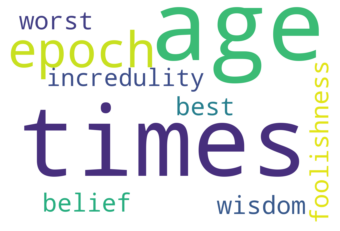

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt 
from wordcloud import WordCloud 

wordcloud = WordCloud( background_color="white",  width=1500,height=1000, max_words= 100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(word_frequencies)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


If the code above produced an error message, this may be caused by the fact that `wordcloud` module has not been inestalled yet on your computer. In that case, you may need to install the `wordcloud` module using the commands in the cell below:

In [10]:
# Remove the hashes in the next two lines!

#import sys
#!pip install wordcloud

## Caveats


The code that was explained in this notebook tokenises texts using the `word_tokenize()` method from `nltk`. As was explained, this method treats all the punction marks as separate tokens. Arguably, such occurrences of semi-colons, dots, commas and quotes should be ignored when we calculate the frequencies of words. We can do this by using a method which removes the tokens that don't contain any alphanumerical characters. 

In the case of tokens containing the genitival 's' (e.g. as in "the people's choice" or "the child's parents", `nltk` aims to separate the final 's' from the rest of the word. As a result of this, the character 's' will likewise be viewed and processed as a separate token. 

Something similar happens with the various parts of contracted verb forms. `nltk` aims to separate the stem from the rest of token in forms such as "don't", "i'm" and "weren't", but this results in tokens such as "'nt", "'m" and "'t", respectively. 

In [11]:
quote = "It's a corrupting thing to live one's real life in secret."
words = word_tokenize(quote)
for word in words:
    print(word)

It
's
a
corrupting
thing
to
live
one
's
real
life
in
secret
.


The question whether words in the genitival forms and contracted verb forms must be counted separately is of course open to debate. It can be useful to know, however, that such 'incomplete' tokens are also on `nltk`'s list of stopwords. When you filter the list of tokens using these stopwords, you will also get rid of seemingly nonsensical tokens such as "'m", "'s" and "'t". 

In [12]:
quote = "It is a corrupting thing to live one's real life in secret."
words = word_tokenize(quote.lower())
words = remove_punctuation_and_stopwords(words)

for word in words:
    print(word)

corrupting
thing
live
one
real
life
secret


## Exercise 9.2.

What are the 25 most frequent words in *Brave New Worls*, if you disregard all the words that are on the `nltk` list of English stopwords? 